In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:44:07,856 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:07,858 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:07,860 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:07,864 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:44:07,865 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:07,929 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:44:08,607 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:08,611 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:08,613 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:08,617 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:08,617 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:08,617 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:08,618 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:08,619 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:09,254 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:44:09,434 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:09,435 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:09,436 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:09,439 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:10,039 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 7
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136175008774, 864691135748575017, 864691136535575714,
       864691135212632448, 864691135491233631])


--- Working on Neuron 864691136175008774 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 269, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2488, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2757
n_valid_syn_ids_presyn = 269
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2488
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136175008774
Postsyn counts:
TP:2482
TN:0
FP:6
FN:0
Presyn counts:
TP:107
TN:0
FP:162
FN:0


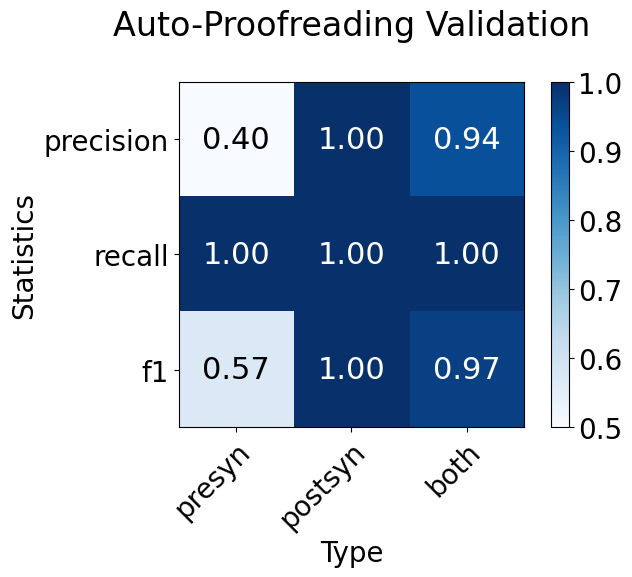

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136175008774_validation_df.pbz2
File size is 0.057118 MB
Total time for neuron 864691136175008774: 117.48418855667114

--- Working on Neuron 864691135748575017 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 202, # error synapses  = 26, # error presyns = 0
For postsyn: # valid synapses = 4571, # error synapses  = 4, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4803
n_valid_syn_ids_presyn = 202
n_errored_syn_ids_presyn = 26
n_valid_syn_ids_postsyn = 4571
n_errored_syn_ids_postsyn = 4
Segment Id = 864691135748575017
Postsyn counts:
TP:4570
TN:4
FP:1
FN:0
Presyn counts:
TP:33
TN:26
FP:169
FN:0


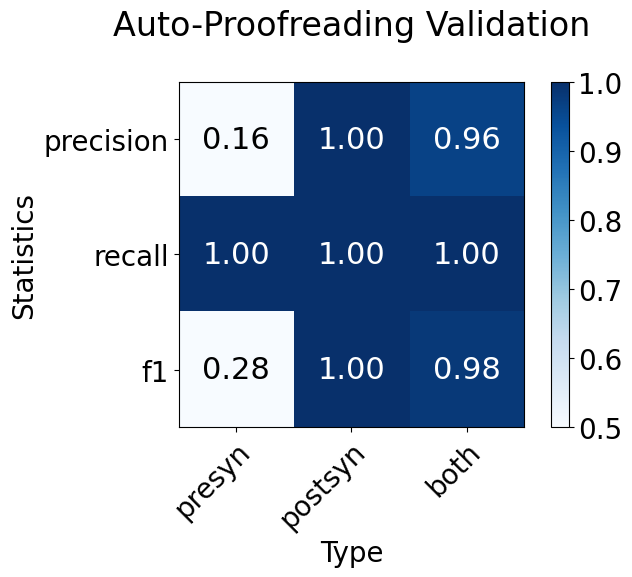

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135748575017_validation_df.pbz2
File size is 0.095416 MB
Total time for neuron 864691135748575017: 76.3603503704071

--- Working on Neuron 864691136535575714 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 99, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 7052, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7152
n_valid_syn_ids_presyn = 99
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 7052
n_errored_syn_ids_postsyn = 1
Segment Id = 864691136535575714
Postsyn counts:
TP:7046
TN:0
FP:6
FN:1
Presyn counts:
TP:24
TN:0
FP:75
FN:0


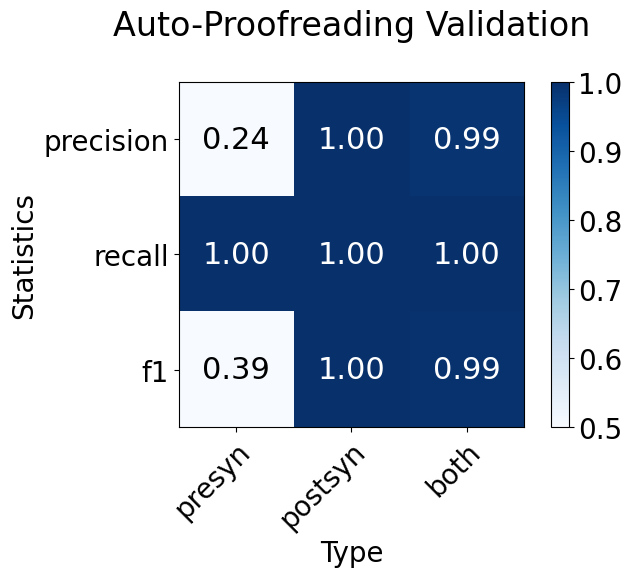

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136535575714_validation_df.pbz2
File size is 0.139527 MB
Total time for neuron 864691136535575714: 99.6021318435669

--- Working on Neuron 864691135212632448 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 412, # error synapses  = 1, # error presyns = 0
For postsyn: # valid synapses = 3334, # error synapses  = 25, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3772
n_valid_syn_ids_presyn = 412
n_errored_syn_ids_presyn = 1
n_valid_syn_ids_postsyn = 3334
n_errored_syn_ids_postsyn = 25
Segment Id = 864691135212632448
Postsyn counts:
TP:3320
TN:0
FP:14
FN:25
Presyn counts:
TP:29
TN:1
FP:383
FN:0


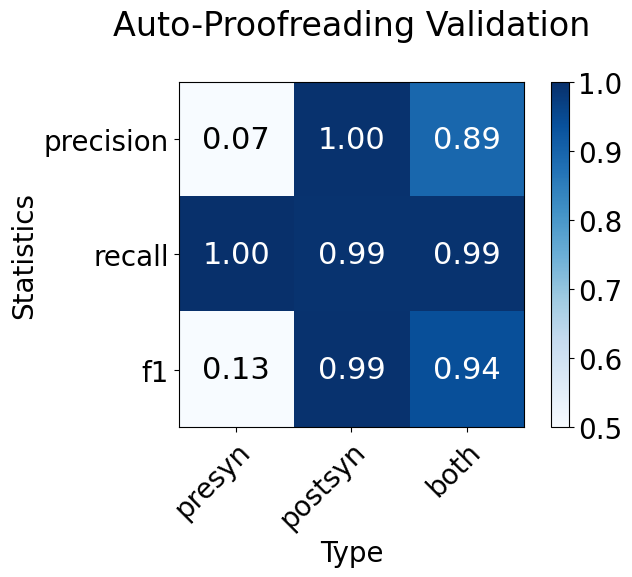

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135212632448_validation_df.pbz2
File size is 0.07508 MB
Total time for neuron 864691135212632448: 96.69845223426819

--- Working on Neuron 864691135491233631 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 166, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 757, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 166
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 757
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135491233631
Postsyn counts:
TP:752
TN:0
FP:5
FN:0
Presyn counts:
TP:15
TN:0
FP:151
FN:0


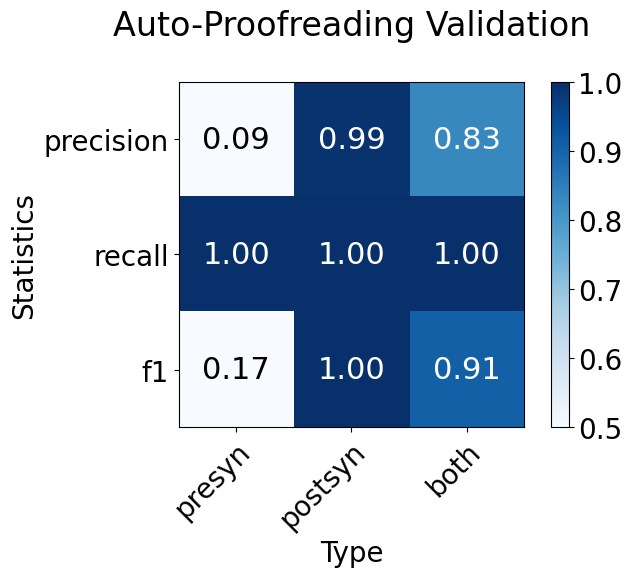

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135491233631_validation_df.pbz2
File size is 0.020082 MB
Total time for neuron 864691135491233631: 28.904485940933228


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")